<a href="https://colab.research.google.com/github/DitaAnatasya/google_colab/blob/main/Kelompok4_PerbandinganKlasifikasiKNNvsDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # KELOMPOK 4

### Anggota
*  Dita Anatasya (2008107010060)
*  Putri Maulida (2008107010074)
*  Hamal Rizqy Mukhda (2008107010045)
*  Athiya Nurul Fadhila (2008107010088)
*  Adinda Siti Humairah (2008107010076)

# DATASET

Dataset yang diambil merupakan dataset yang digunakan untuk mencari tahu solusi iklan di internet dengan menggunakan data pelanggan. Melalui data usia dan estimasi penghasilan, maka akan didapatkan kelompok mana yang memiliki kemungkinan lebih tinggi untuk membeli produk yang menjadi target iklan tersebut.
Dataset ini diambil dari kaggle: https://www.kaggle.com/datasets/baguskurniawanadhi/iklancsv

Berikut penjelasan atribut yang digunakan:
*   User ID
*   Gender
*   Usia
*   Estimasi gaji
*   Beli

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Read dataset with pandas
df = pd.read_csv("Iklan_sosmed.csv")

In [ ]:
# mengubah penamaan dalam dataset
df["Kelamin"] = df["Kelamin"].map({'Laki':0, 'Perempuan':1}).astype(int)

In [ ]:
# Melihat 5 data teratas
df.head()

,User ID,Kelamin,Usia,EstimasiGaji,Beli
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [ ]:
# Melihat 5 data terbawah
df.tail()

,User ID,Kelamin,Usia,EstimasiGaji,Beli
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0
399,15594041,1,49,36000,1


In [ ]:
df.columns

Index(['User ID', 'Kelamin', 'Usia', 'EstimasiGaji', 'Beli'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   User ID       400 non-null    int64
 1   Kelamin       400 non-null    int64
 2   Usia          400 non-null    int64
 3   EstimasiGaji  400 non-null    int64
 4   Beli          400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


# KNN


In [ ]:
# Import Modul
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# menentukan x dan y
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

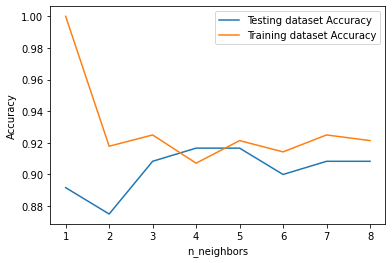

0.9214285714285714
0.9083333333333333


In [ ]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Memprediksi Test set
y_pred = knn.predict(X_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, knn.predict(X_train)))
classifier_acc = accuracy_score(y_test, knn.predict(X_test))
print(classifier_acc)

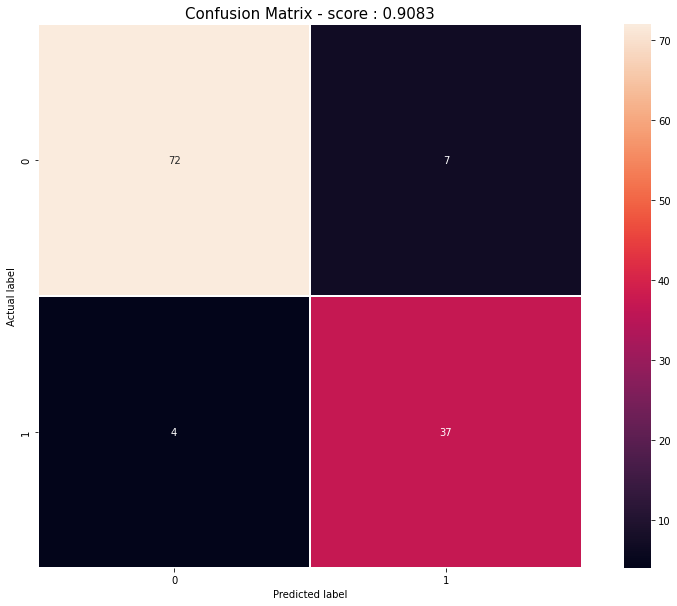

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[72  7]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.84      0.90      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



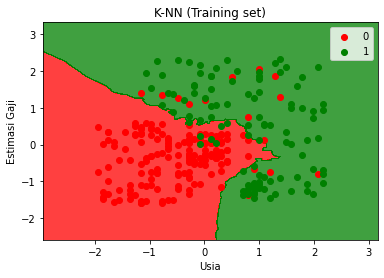

In [ ]:
# Visualisasi hasil Training set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

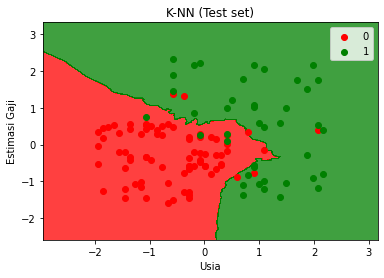

In [ ]:
# Visualisasi hasil Test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

# DECISION TREE

In [ ]:
# import modul
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# feature selection
feature_cols = ['Usia', 'EstimasiGaji']
x = df[feature_cols] #feature
y = df.Beli    # Targer Variable

# split dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

# building decision tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predicted_values = clf.predict(X_test)

# accuracy
print("Akurasi: ", metrics.accuracy_score(y_test, predicted_values))

Akurasi:  0.85


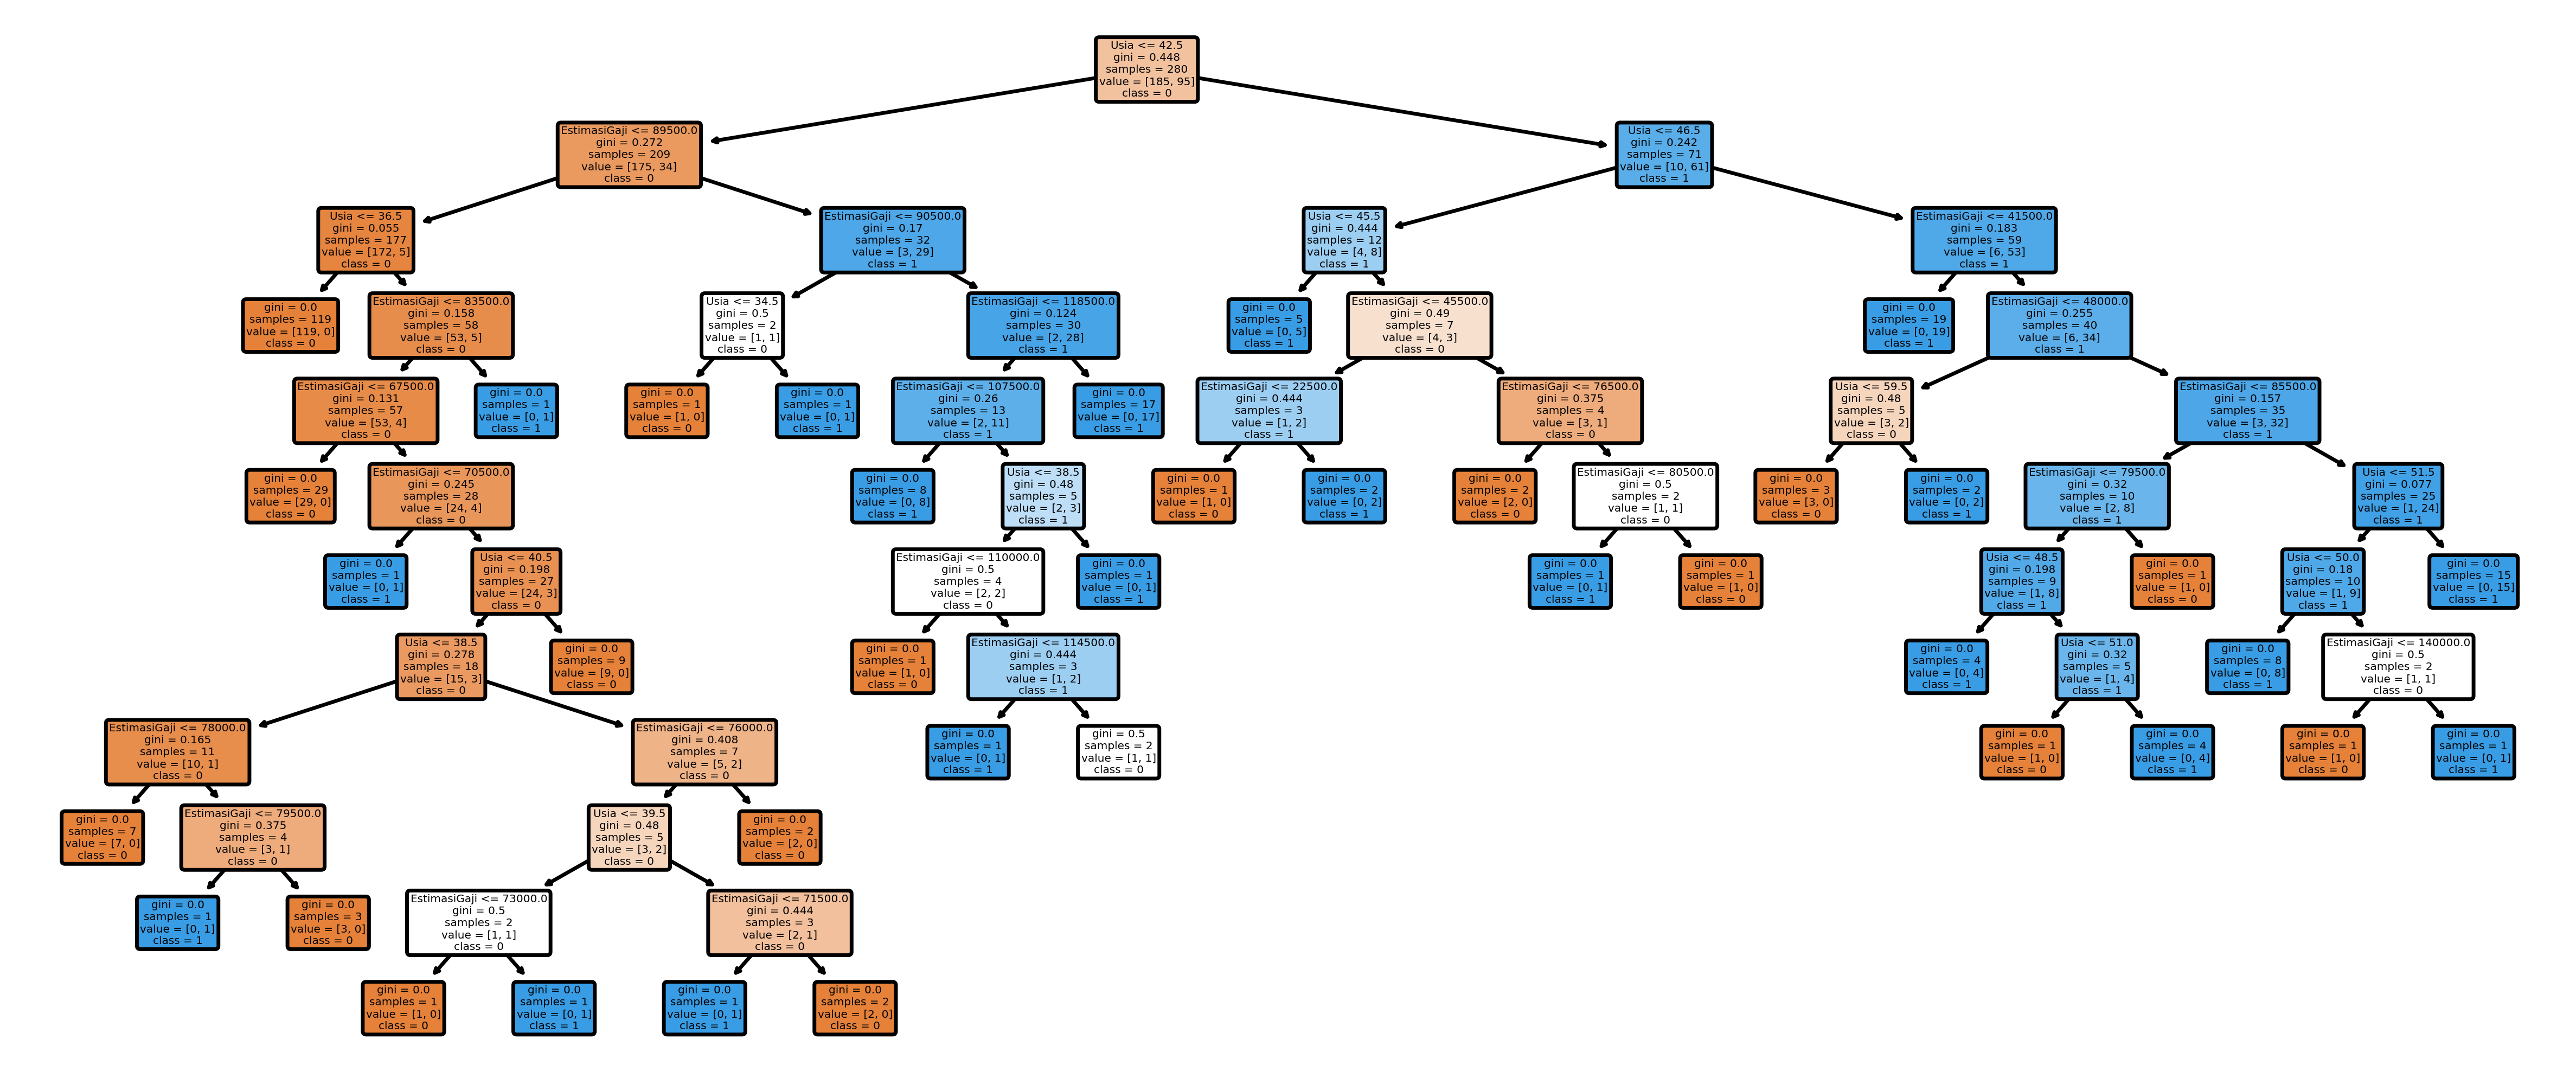

In [ ]:
#Visualisasi Model

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize =(12, 5 ), dpi=500)
tree.plot_tree(clf,
               feature_names = feature_cols,
               class_names = ["0", "1"],
               filled = True,
               rounded = True);
plt.savefig('dtree.png')

# PERBANDINGAN

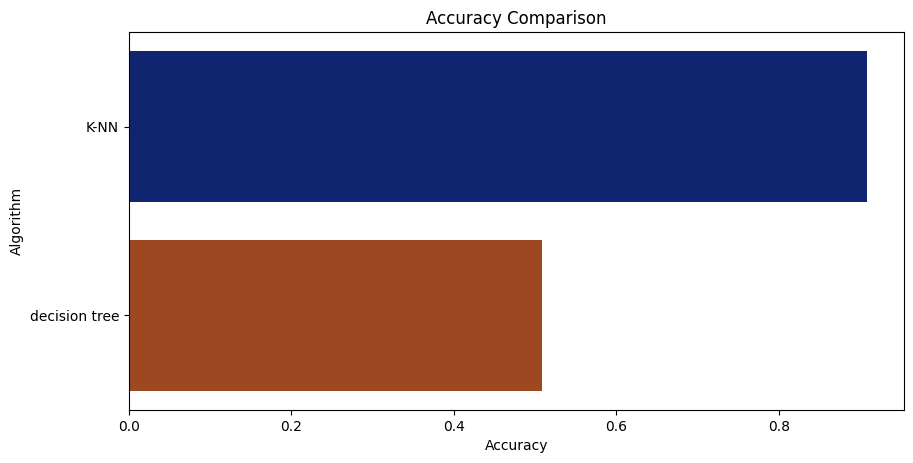

In [ ]:
acc = []
model = []

a = metrics.accuracy_score(y_test, y_pred)
acc.append(a)
model.append('K-NN')

b = metrics.accuracy_score(y_test, predicted_values)
acc.append(b)
model.append('decision tree')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

Setelah dilakukan klasifisikasi dengan metode KNN dan Decision Tree, hasil akurasi dari kedua nya bisa dibandingkan dengan cara memanfaatkan list acc[] dan model[] yang sudah dibuat sebelumnya. Dapat dilihat dari gambar diatas, setelah dilakukan perbandingan antara kedua klasifikasi yaitu antara klasifikasi menggunakan metode KNN dan Decision Tree diperoleh hasil dimana akurasi yang dimiliki adalah  0.85 untuk decision tree dan 0.90 untuk K-NN

Dari metode klasifikasi yang telah dilakukan diatas dapat disimpulkan bahwa dari kedua klasifikasi diatas yang telah dicoba yaitu klasifikasi menggunakan metode KNN dan Decision Tree didapat hasil bahwa model dengan metode K-NN yang terbaik dibandingkan dengan metode Decision Tree